In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


In [2]:
# ETAPA 1: EXPLORAÇÃO DOS DADOS

# Geração de um conjunto de dados sintético para simular dados de satélites
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=42)

# Convertendo para um DataFrame do Pandas
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

print("Cabeçalho do DataFrame:")
display(df.head())

print("\nEstatísticas Descritivas:")
display(df.describe())

Cabeçalho do DataFrame:


,Feature_1,Feature_2
0,-9.205816,6.643647
1,-9.526658,7.015878
2,-1.851162,8.037611
3,-7.053772,-6.001088
4,-10.468827,6.517054



Estatísticas Descritivas:


,Feature_1,Feature_2
count,300.000000,300.000000
mean,-3.402433,2.847806
std,5.253569,6.209243
min,-10.815643,-8.511495
25%,-7.953934,-0.992925
50%,-4.866389,5.268670
75%,-0.238470,8.042539
max,6.491606,10.984880


Gerando visualização dos dados brutos...


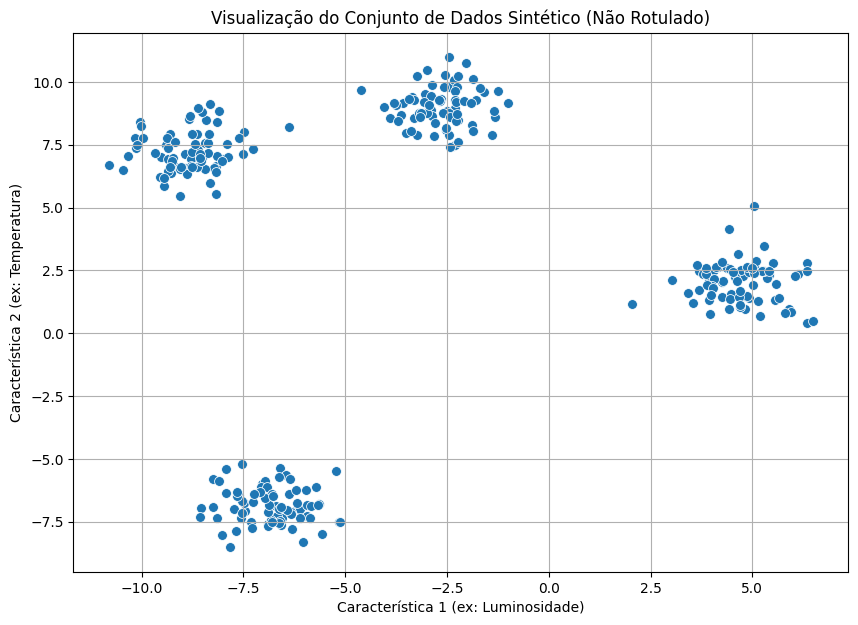

In [10]:
# Visualização inicial dos dados não rotulados
print("Gerando visualização dos dados brutos...")
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Feature_1', y='Feature_2', data=df, s=50)
plt.title('Visualização do Conjunto de Dados Sintético (Não Rotulado)')
plt.xlabel('Característica 1 (ex: Luminosidade)')
plt.ylabel('Característica 2 (ex: Temperatura)')
plt.grid(True)
plt.savefig('main_files/visualizacao_inicial.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
# ETAPA 2: PRÉ-PROCESSAMENTO

# Verificação de valores ausentes (embora saibamos que não há neste caso)
print("Verificação de valores ausentes:")
print(df.isnull().sum())

# Normalização (Padronização) dos dados
print("\n>>> Aplicando padronização (StandardScaler) aos dados...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dados padronizados com sucesso.")

Verificação de valores ausentes:
Feature_1    0
Feature_2    0
dtype: int64

>>> Aplicando padronização (StandardScaler) aos dados...
Dados padronizados com sucesso.


Gerando gráfico do Método do Cotovelo...


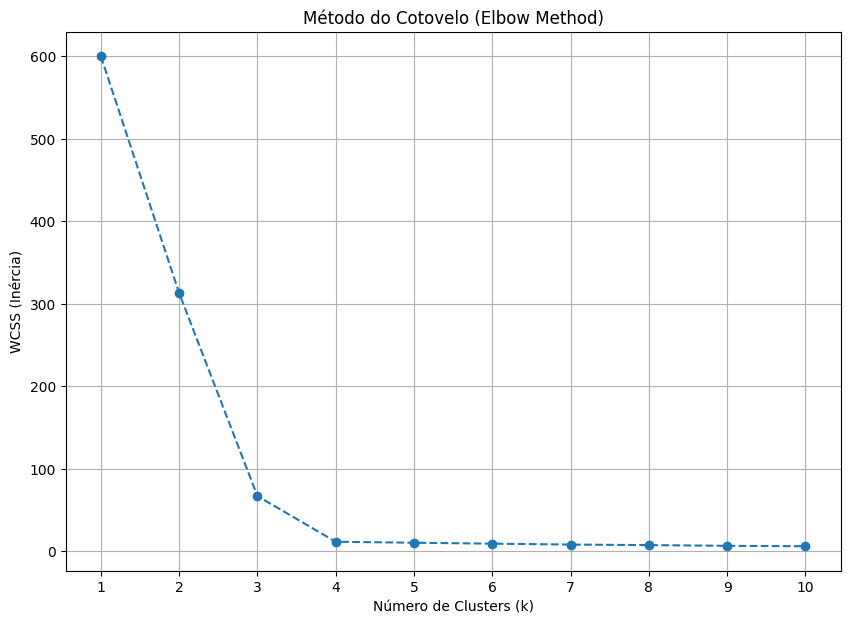

In [11]:
# ETAPA 4 (PARTE 1): Descoberta do 'k' ótimo

# Calculando a inércia (WCSS) para diferentes valores de k
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do Método do Cotovelo
print("Gerando gráfico do Método do Cotovelo...")
plt.figure(figsize=(10, 7))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('main_files/metodo_cotovelo.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# ETAPA 4 (PARTE 2): Treinamento do modelo final

# Definindo o k ótimo com base no gráfico anterior
k_otimo = 4
print(f"O número ótimo de clusters escolhido foi k = {k_otimo}.")

# Treinando o modelo final
kmeans_final = KMeans(n_clusters=k_otimo, n_init='auto', random_state=42)
kmeans_final.fit(X_scaled)

# Capturando os rótulos e os centroides
cluster_labels = kmeans_final.labels_
centroids = kmeans_final.cluster_centers_

# Adicionando os rótulos dos clusters ao DataFrame
df['cluster'] = cluster_labels

print("Modelo K-Means treinado e rótulos dos clusters atribuídos.")

O número ótimo de clusters escolhido foi k = 4.
Modelo K-Means treinado e rótulos dos clusters atribuídos.


Gerando visualização dos clusters encontrados...


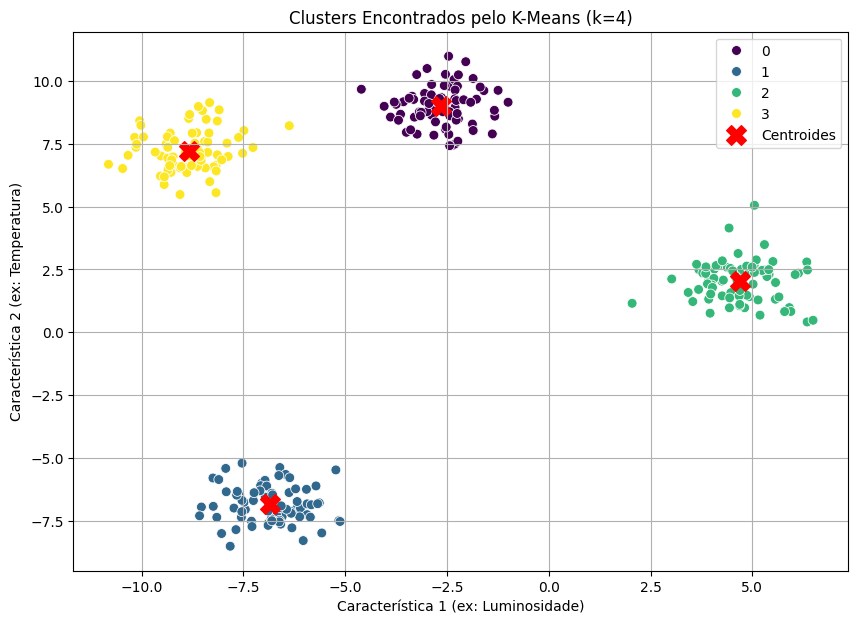


O Score de Silhueta para k=4 é: 0.8386


In [12]:
# ETAPA 5: AVALIAÇÃO DO MODELO

# Visualização dos clusters encontrados pelo algoritmo
print("Gerando visualização dos clusters encontrados...")
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='cluster', data=df, palette='viridis', s=50, legend='full')

# Plotando os centroides (des-escalados para a escala original dos dados)
centroids_original_scale = scaler.inverse_transform(centroids)
plt.scatter(centroids_original_scale[:, 0], centroids_original_scale[:, 1], s=200, c='red', marker='X', label='Centroides')

plt.title(f'Clusters Encontrados pelo K-Means (k={k_otimo})')
plt.xlabel('Característica 1 (ex: Luminosidade)')
plt.ylabel('Característica 2 (ex: Temperatura)')
plt.legend()
plt.grid(True)
plt.savefig('main_files/clusters_finais.png', dpi=300, bbox_inches='tight')
plt.show()


# Avaliação Quantitativa: Score de Silhueta (Silhouette Score)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"\nO Score de Silhueta para k={k_otimo} é: {silhouette_avg:.4f}")